In [1]:
import cv2
import numpy as np
import os
import xlrd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib
from itertools import combinations
from openpyxl import load_workbook
import pandas as pd
from itertools import islice


# work_book = xlrd.open_workbook('data_all.xls')
# work_book = xlrd.open_workbook('data_all_noGroud.xls')
# work_book = xlrd.open_workbook('data_only1.xls')
work_book = load_workbook('data_all.xlsx')
# work_book = load_workbook('data_only1.xlsx')
# work_book = load_workbook("test_data.xlsx")
work_sheel = work_book['Sheet']

# label = np.array(work_sheel.col_values(0, start_rowx=0, end_rowx=None))               # 标签
# data1 = np.array(work_sheel.col_values(1, start_rowx=0, end_rowx=None)).reshape(-1, 1)# B
# data2 = np.array(work_sheel.col_values(2, start_rowx=0, end_rowx=None)).reshape(-1, 1)# G
# data3 = np.array(work_sheel.col_values(3, start_rowx=0, end_rowx=None)).reshape(-1, 1)# R
# data4 = np.array(work_sheel.col_values(4, start_rowx=0, end_rowx=None)).reshape(-1, 1)# GRE
# data5 = np.array(work_sheel.col_values(5, start_rowx=0, end_rowx=None)).reshape(-1, 1)# NIR
# data6 = np.array(work_sheel.col_values(6, start_rowx=0, end_rowx=None)).reshape(-1, 1)# REG
# data7 = np.array(work_sheel.col_values(7, start_rowx=0, end_rowx=None)).reshape(-1, 1)# RED

data = np.array(list(work_sheel.values))
label = data[:, 0].ravel()
data = data[:, 1:4].reshape(-1, 3)
# data = data[:, 1:].reshape(-1, 7)

# data = np.hstack([data1, data2, data3, data4, data5, data6, data7])
comb = [0,1,2,3,4,5,6]
data_use = []
print(data.shape)



(44955, 3)


In [2]:
# for j in range(1, 8):
#     for i in combinations(comb, j):
#         count = 0
#         for k in i:
#             if (count == 0):
#                 data_use = data[:,k].reshape(-1,1)
#                 count =1
#             else:
#                 data_use = np.hstack((data_use, data[:,k].reshape(-1,1)))
#         print (i)

#         clf = svm.SVC()
#         clf1 = RandomForestClassifier()
#         X_train, X_test, y_train, y_test = train_test_split(data_use,
#                                                         label,
#                                                         test_size=0.2,
#                                                         random_state=21)
#         clf.fit(X_train, y_train)
#         y_pred = clf.predict(X_test)
#         Accuracy = accuracy_score(y_test, y_pred)
#         print('Accuracy: ', Accuracy)


# clf = svm.SVC(C=500, cache_size=4096)
clf = svm.SVC(C=0.01)
# clf1 = RandomForestClassifier()
# X_train, X_test, y_train, y_test = train_test_split(data,
#                                                 label,
#                                                 test_size=0.2,
#                                                 random_state=2)
X_train, X_test, y_train, y_test = train_test_split(data,
                                            label,
                                            test_size=0.2,
                                            random_state=21)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', Accuracy)


# X_train, X_test, y_train, y_test = train_test_split(bgr,
#                                                 label,
#                                                 test_size=0.2,
#                                                 random_state=42)
# #初始化一个随机森林分类器模型

# # 用训练集训练这个分类器模型
# clf1.fit(X_train, y_train)

# # 用训练好的分类器对测试集进行预测
# y_pred = clf1.predict(X_test)

# print (RS)
# print('Accuracy: ', accuracy_score(y_test, y_pred))
# Save classifier
# joblib.dump(clf1, 'wilt_hog_rf_clf.pkl')


# joblib.dump(clf, 'svm_clf.pkl')
# joblib.dump(clf, 'svm_clf_rgb.pkl')
joblib.dump(clf, 'svm_rgb2.pkl')
print('Done!')

Accuracy:  0.9012345679012346
Done!


In [4]:
clf.get_params()

['svm_clf.pkl']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                label,
                                                test_size=0.2,
                                                random_state=21)
print(y_test)

[1 2 2 ... 0 0 0]


In [4]:
a1 = 0
a2 = 0
a3 = 0
for i in y_train:
    if i == 0:
        a1+=1
    elif i == 1:
        a2 += 1
    else:
        a3 += 1
print(a1, a2, a3)

14889 8767 12308


In [15]:
a1 = 0
a2 = 0
a3 = 0
for i in y_test:
    if i == 0:
        a1+=1
    elif i == 1:
        a2 += 1
    else:
        a3 += 1
print(a1, a2, a3)

3677 2180 3134


[3677 2180 3134]
0.9491433233614359
0.03807451726951319
0.012782159369050857
0.13486238532110092
0.7903669724770642
0.07477064220183487
0.015315890236119975
0.008296107211231652
0.9763880025526483


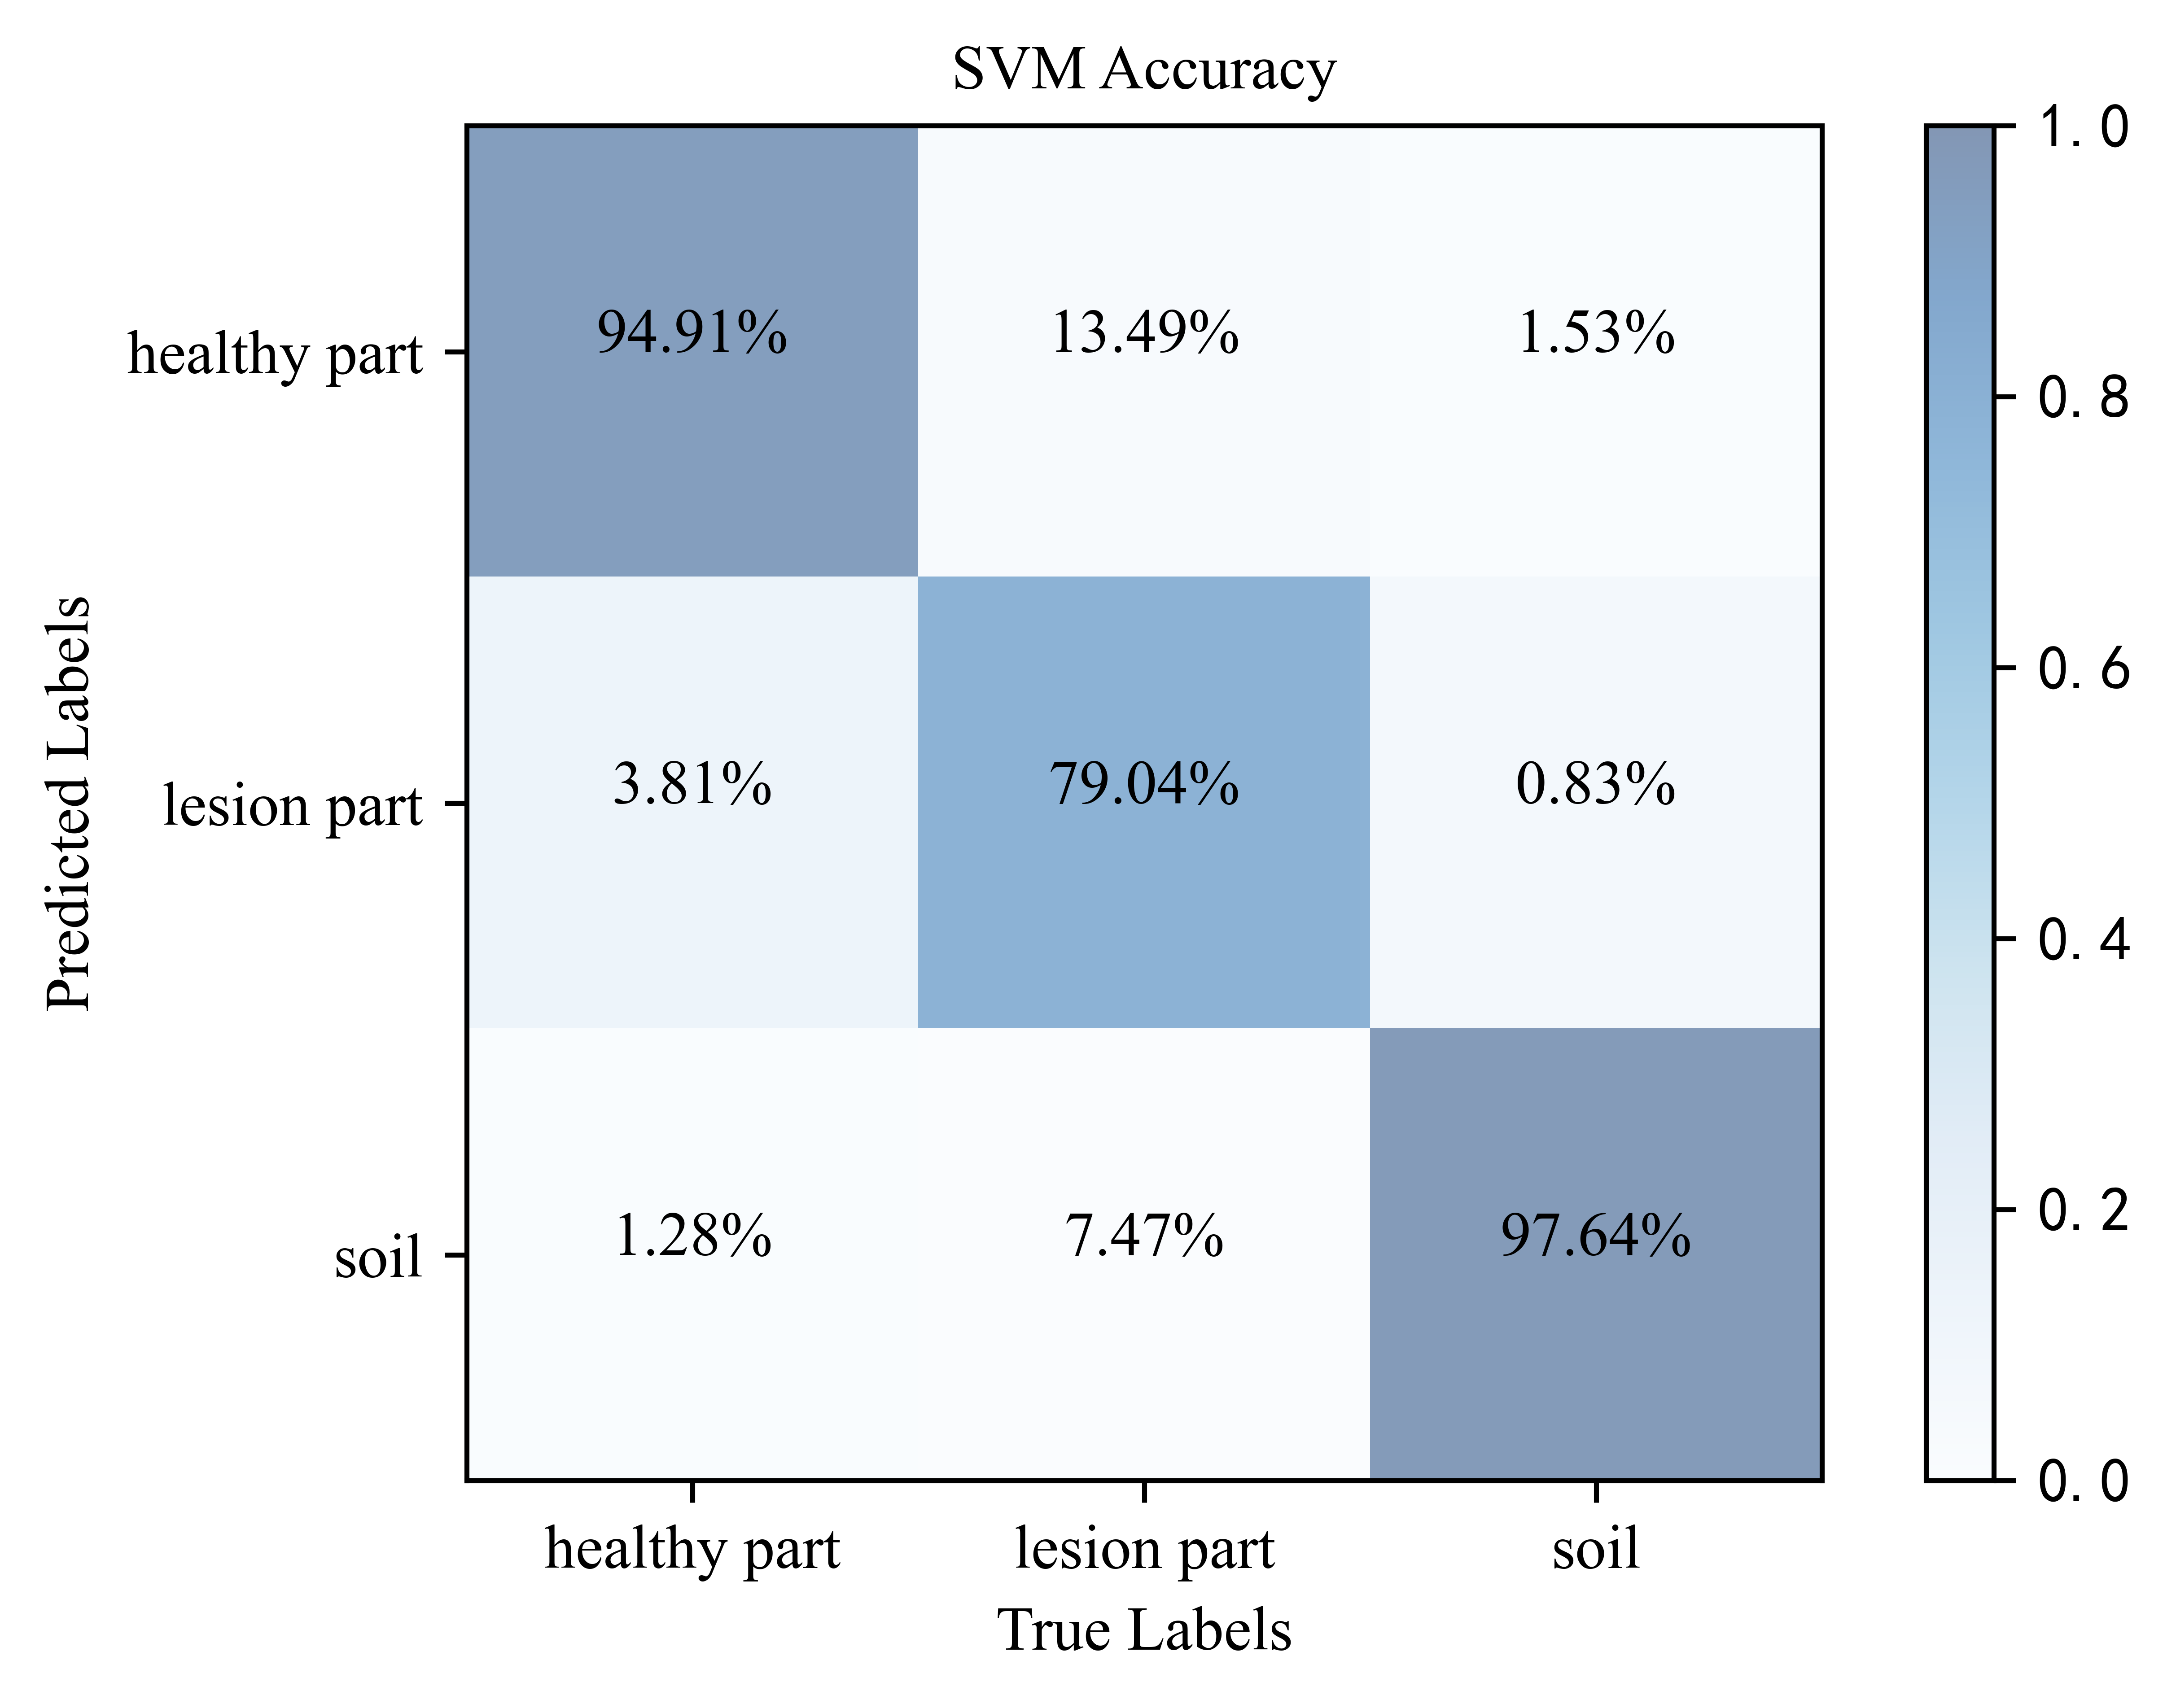

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors
plt.figure(dpi=1000)

# clf = joblib.load('svm_clf_rgb.pkl')
clf = joblib.load('svm_clf.pkl')
# clf = joblib.load('svm_only1.pkl')
# pre_test = clf.predict(X_test[:, :3])
pre_test = clf.predict(X_test)
# print(pre_test)

confusion = confusion_matrix(y_test, pre_test)
# confusion = confusion[:-1, 1:]
s = np.sum(confusion, axis=1)
print(s)
confusion = confusion.astype(np.float64)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        print(confusion[i][j]/s[i])
        confusion[i][j] = confusion[i][j] / s[i]
plt.imshow(confusion, cmap=plt.cm.Blues, alpha=0.5, vmin=0, vmax=1)

indices = range(len(confusion))
# ticks 坐标轴的坐标点
# label 坐标轴标签说明
indices = range(len(confusion))
# 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
# plt.xticks(indices, [0, 1, 2])
# plt.yticks(indices, [0, 1, 2])
plt.xticks(indices, ['healthy part', 'lesion part', 'soil'], fontproperties='Times New Roman')
plt.yticks(indices, ['healthy part', 'lesion part', 'soil'], fontproperties='Times New Roman')
 
plt.xlabel('True Labels', fontproperties='Times New Roman')
plt.ylabel('Predicted Labels', fontproperties='Times New Roman')
plt.title('SVM Accuracy', fontproperties='Times New Roman')
 
# plt.rcParams两行是用于解决标签不能显示汉字的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 显示数据
for first_index in range(len(confusion)):  # 第几行
    for second_index in range(len(confusion[first_index])):  # 第几列
        if first_index == 1 and second_index == 2:
            plt.text(first_index, second_index, "{:.2f}%".format(round(confusion[first_index][second_index], 4)*100-0.01), 
                 fontproperties='Times New Roman', horizontalalignment="center")
            continue
        plt.text(first_index, second_index, "{:.2f}%".format(round(confusion[first_index][second_index], 4)*100), 
                 fontproperties='Times New Roman', horizontalalignment="center")
# 在matlab里面可以对矩阵直接imagesc(confusion)
plt.colorbar()
 
# 显示
plt.savefig('fig12.png')
plt.show()

[3677 2180 3134]


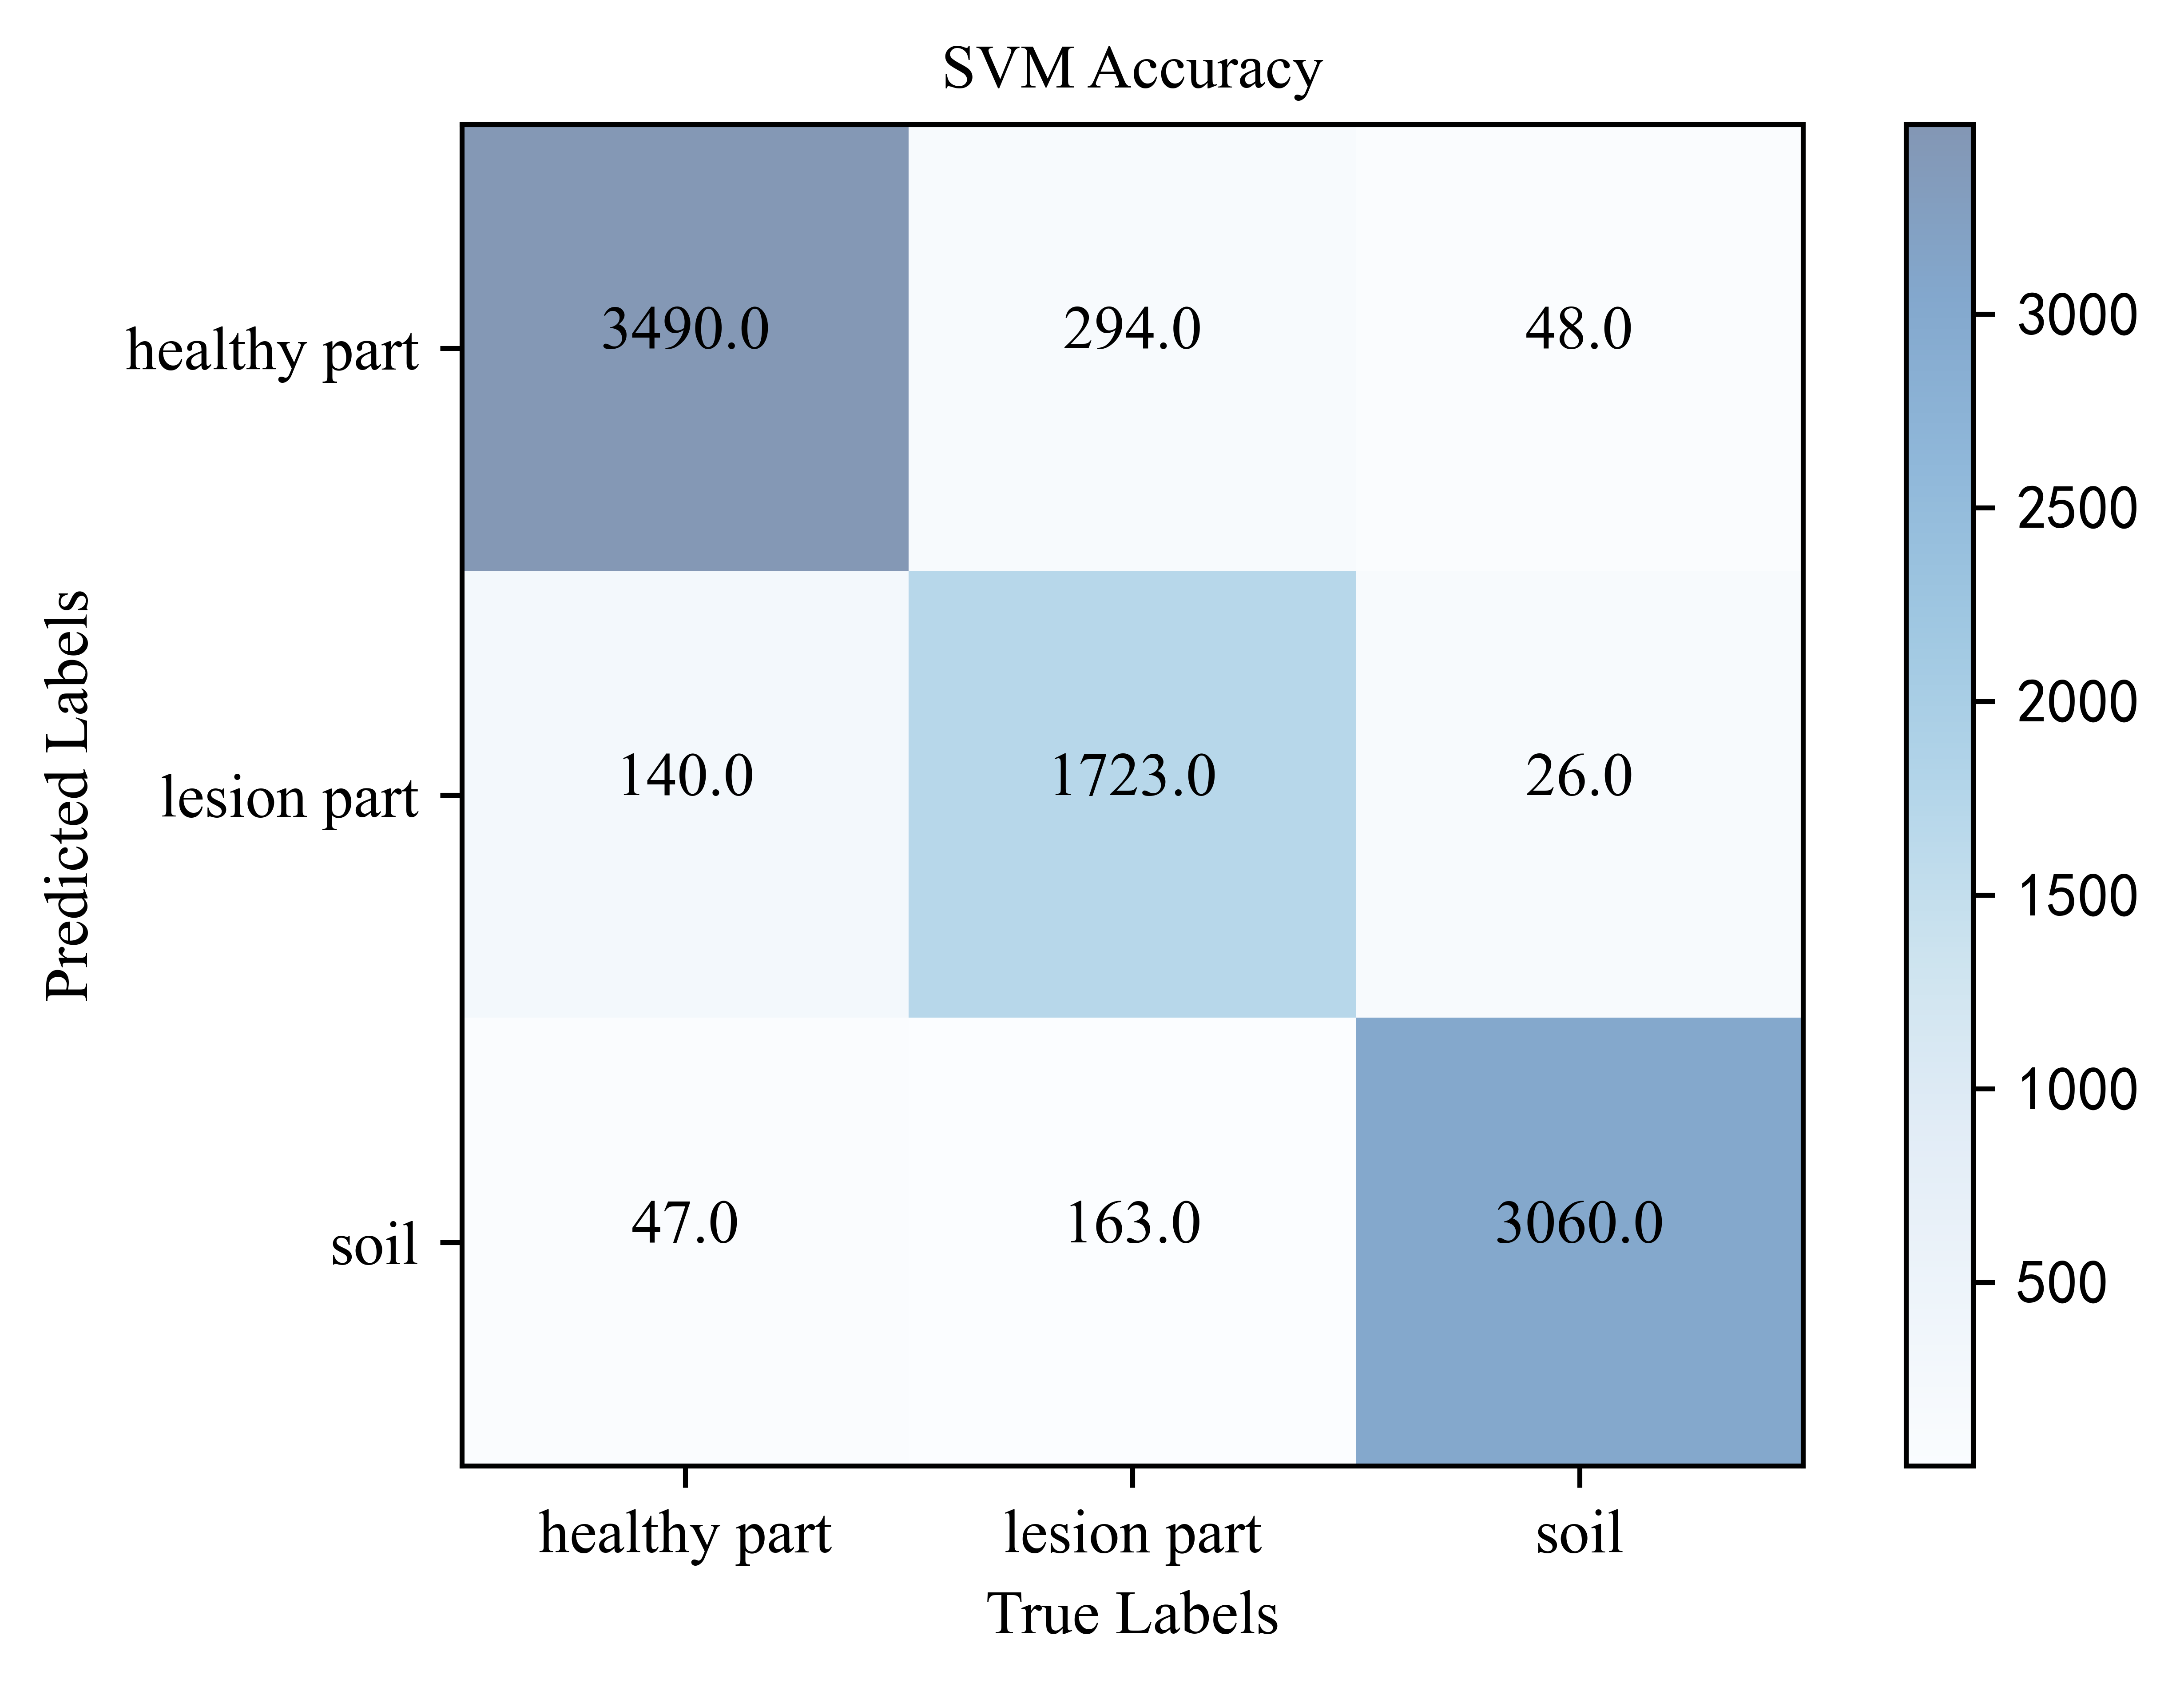

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors
plt.figure(dpi=1000)

# clf = joblib.load('svm_clf_rgb.pkl')
clf = joblib.load('svm_clf.pkl')
# clf = joblib.load('svm_clf_only1.pkl')
# pre_test = clf.predict(X_test[:, :3])
pre_test = clf.predict(X_test)
# print(pre_test)

confusion = confusion_matrix(y_test, pre_test)
# confusion = confusion[:-1, 1:]
s = np.sum(confusion, axis=1)
print(s)
confusion = confusion.astype(np.float64)
plt.imshow(confusion, cmap=plt.cm.Blues, alpha=0.5)

indices = range(len(confusion))
# ticks 坐标轴的坐标点
# label 坐标轴标签说明
indices = range(len(confusion))
# 第一个是迭代对象，表示坐标的显示顺序，第二个参数是坐标轴显示列表
# plt.xticks(indices, [0, 1, 2])
# plt.yticks(indices, [0, 1, 2])
plt.xticks(indices, ['healthy part', 'lesion part', 'soil'], fontproperties='Times New Roman')
plt.yticks(indices, ['healthy part', 'lesion part', 'soil'], fontproperties='Times New Roman')
 
plt.xlabel('True Labels', fontproperties='Times New Roman')
plt.ylabel('Predicted Labels', fontproperties='Times New Roman')
plt.title('SVM Accuracy', fontproperties='Times New Roman')
 
# plt.rcParams两行是用于解决标签不能显示汉字的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


# 显示数据
for first_index in range(len(confusion)):  # 第几行
    for second_index in range(len(confusion[first_index])):  # 第几列
        plt.text(first_index, second_index, confusion[first_index][second_index], 
                 fontproperties='Times New Roman', horizontalalignment="center")
# 在matlab里面可以对矩阵直接imagesc(confusion)
plt.colorbar()
 
# 显示
plt.show()

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

print('使用SVM预测数据的准确率为：', 
accuracy_score(y_test, pre_test))      
print('使用SVM预测数据的精确率为：',
      precision_score(y_test, pre_test, average='macro'))
print('使用SVM预测数据的召回率为：',
      recall_score(y_test, pre_test, average='macro'))
print('使用SVM预测数据的F1值为：',
      f1_score(y_test, pre_test, average='macro'))
print('使用SVM预测数据的Cohen’s Kappa系数为：',
      cohen_kappa_score(y_test, pre_test))

使用SVM预测数据的准确率为： 0.918918918918919
使用SVM预测数据的精确率为： 0.9186085551020621
使用SVM预测数据的召回率为： 0.9028576266345842
使用SVM预测数据的F1值为： 0.9085861800222115
使用SVM预测数据的Cohen’s Kappa系数为： 0.8747880312328875


In [15]:
from sklearn import metrics
def sensitivityCalc(Predictions, Labels):
    MCM = metrics.multilabel_confusion_matrix(Labels, Predictions,
                                      sample_weight=None,
                                      labels=None, samplewise=None)
    # MCM此处是 5 * 2 * 2的混淆矩阵（ndarray格式），5表示的是5分类

    # 切片操作，获取每一个类别各自的 tn, fp, tp, fn
    tn_sum = MCM[:, 0, 0] # True Negative
    fp_sum = MCM[:, 0, 1] # False Positive

    tp_sum = MCM[:, 1, 1] # True Positive
    fn_sum = MCM[:, 1, 0] # False Negative
    print('here', np.average(tn_sum), np.average(fp_sum), np.average(tp_sum), np.average(fn_sum))
    # 这里加1e-6，防止 0/0的情况计算得到nan，即tp_sum和fn_sum同时为0的情况
    Condition_negative = tp_sum + fn_sum + 1e-6
    
    sensitivity = tp_sum / Condition_negative
    macro_sensitivity = np.average(sensitivity, weights=None)

    micro_sensitivity = np.sum(tp_sum) / np.sum(tp_sum+fn_sum)

    return macro_sensitivity, micro_sensitivity

def specificityCalc(Predictions, Labels):
    MCM = metrics.multilabel_confusion_matrix(Labels, Predictions,
                                      sample_weight=None,
                                      labels=None, samplewise=None)
    tn_sum = MCM[:, 0, 0]
    fp_sum = MCM[:, 0, 1]

    tp_sum = MCM[:, 1, 1]
    fn_sum = MCM[:, 1, 0]

    Condition_negative = tn_sum + fp_sum + 1e-6

    Specificity = tn_sum / Condition_negative
    macro_specificity = np.average(Specificity, weights=None)

    micro_specificity = np.sum(tn_sum) / np.sum(tn_sum+fp_sum)

    return macro_specificity, micro_specificity

In [16]:
print(sensitivityCalc(pre_test, y_test))
print(specificityCalc(pre_test, y_test))

here 17264 718 8273 718
(0.9052994324863061, 0.920142364586809)
(0.9584716095939356, 0.9600711822934045)


In [34]:
clf = joblib.load('save/svm_clf.pkl')
# print(data.shape)
# pre = clf.predict(data[:, :3])
pre = clf.predict(data)
print(accuracy_score(label, pre))

0.7939657515629247


In [29]:
clf = joblib.load('save/svm_clf_rgb.pkl')
pre = clf.predict(data[:, :3])
# pre = clf.predict(data)
print(accuracy_score(label, pre))

0.7842793249153673


In [30]:

work_book = load_workbook("test_data.xlsx")
work_sheel = work_book['Sheet']e)).reshape(-1, 1)# RED

data = np.array(list(work_sheel.values))
label = data[:, 0].ravel()
# data = data[:, 1:4].reshape(-1, 3)
data = data[:, 1:].reshape(-1, 7)

SyntaxError: invalid syntax (Temp/ipykernel_1960/3886728334.py, line 2)

In [24]:
confusion = confusion_matrix(y_test, pre_test)
print(accuracy_score(y_test, pre_test))

0.9099099099099099


In [46]:
import cv2.ml
#使用opencv训练
cv_svm = cv2.ml.SVM_create()
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
# y_train = y_train.astype(np.int32)
# y_test = y_test.astype(np.int32)
print(X_train.shape, y_train.shape)

# 设置参数
cv_svm.setType(cv2.ml.SVM_C_SVC)
# 设置SVM的核函数为RBF，和sklearn默认一致
cv_svm.setKernel(cv2.ml.SVM_RBF)
# 设置SVM的gamma值为scale，和sklearn默认一致
# cv_svm.setGamma(1/2)

# cv_svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, int(1e7), 1e-10))

# 训练模型
cv_svm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)
# 预测测试数据
_, y_pred = cv_svm.predict(X_test)
# 获取支持向量
sv = cv_svm.getUncompressedSupportVectors()
# 计算准确率
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

(35964, 7) (35964,)
Accuracy:  0.8300522744967189


In [7]:
import pickle
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', Accuracy)

with open('svm_rgb.xml', 'wb') as f:
    pickle.dump(clf, f)

Accuracy:  0.9099099099099099


In [9]:
cv_svm = cv2.ml.SVM_load('svm_rgb.xml')
_, y_pred = cv_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\core\src\persistence.cpp:692: error: (-5:Bad argument) Input file is invalid in function 'cv::FileStorage::Impl::open'
